# Unemployment Rate in South Africa 2022


#Predict the percentage of people who is unemployed according to age ,race,province and disability.

# Loading dataset

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read Data

In [2]:
df=pd.read_csv("C:\\Users\\shene\\Dropbox\\PC\\Downloads\\Unemployment rate.csv")
#Show data
df

,UqNr,PersonNR,PSU,Prov,B_Nights,Gender,Age,Age_grp1,Race,F_Linsidehh,...,Literacy3b,stratum,geotype,Q42msal,Metro_code,Metro,employ_Status1,employ_Status2,Rotation,person_wgt
0,160100720000002201,1,16010072000,1,1,1,19,4,2,1,...,0,10301,3,2900,1,2,1,1,3,974.509552
1,160100720000005901,1,16010072000,1,1,1,31,7,1,9,...,0,10301,3,12480,1,2,1,1,3,1896.300138
2,160100720000005901,2,16010072000,1,1,2,25,6,1,9,...,0,10301,3,8960,1,2,1,1,3,1896.300138
3,160100720000005901,3,16010072000,1,1,2,1,1,1,9,...,0,10301,3,888888888,1,2,8,8,3,1896.300138
4,160101220000002601,1,16010122000,1,1,2,71,15,2,1,...,0,10103,1,888888888,1,2,9,3,1,702.936011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71132,987106510000017601,3,98710651000,9,1,2,15,4,1,7,...,0,90216,2,888888888,17,2,9,3,3,954.402474
71133,987106510000017601,4,98710651000,9,1,2,11,3,1,7,...,0,90216,2,888888888,17,2,8,8,3,954.402474
71134,987106510000017601,5,98710651000,9,1,1,9,2,1,7,...,0,90216,2,888888888,17,2,8,8,3,954.402474
71135,987106510000017601,6,98710651000,9,1,1,2,1,1,7,...,0,90216,2,888888888,17,2,8,8,3,954.402474


In [3]:
df.head()

,UqNr,PersonNR,PSU,Prov,B_Nights,Gender,Age,Age_grp1,Race,F_Linsidehh,...,Literacy3b,stratum,geotype,Q42msal,Metro_code,Metro,employ_Status1,employ_Status2,Rotation,person_wgt
0,160100720000002201,1,16010072000,1,1,1,19,4,2,1,...,0,10301,3,2900,1,2,1,1,3,974.509552
1,160100720000005901,1,16010072000,1,1,1,31,7,1,9,...,0,10301,3,12480,1,2,1,1,3,1896.300138
2,160100720000005901,2,16010072000,1,1,2,25,6,1,9,...,0,10301,3,8960,1,2,1,1,3,1896.300138
3,160100720000005901,3,16010072000,1,1,2,1,1,1,9,...,0,10301,3,888888888,1,2,8,8,3,1896.300138
4,160101220000002601,1,16010122000,1,1,2,71,15,2,1,...,0,10103,1,888888888,1,2,9,3,1,702.936011


In [49]:
#Remove columns not needed
df.drop(['B_Nights','Literacy3b', 'Q42msal', 'Q11RELSH', 'Q47JCR', 'Q48RESP', 'F_Linsidehh', 'Q46dAccJob', 'Rotation', 'Metro', 'Metro_code'], axis = 1)

,UqNr,PersonNR,PSU,Prov,Gender,Age,Age_grp1,Race,F_Loutsidehh,Q12aMARST,...,Q46bSTART,Q46cRNSW,undisab,disab,Sevdisab,stratum,geotype,employ_Status1,employ_Status2,person_wgt
0,160100720000002201,1,16010072000,1,1,19,4,2,1,7,...,9,99,0,0,0,10301,3,1,1,974.509552
1,160100720000005901,1,16010072000,1,1,31,7,1,2,2,...,9,99,0,0,0,10301,3,1,1,1896.300138
2,160100720000005901,2,16010072000,1,2,25,6,1,2,2,...,9,99,0,0,0,10301,3,1,1,1896.300138
3,160100720000005901,3,16010072000,1,2,1,1,1,2,7,...,8,88,0,0,0,10301,3,8,8,1896.300138
4,160101220000002601,1,16010122000,1,2,71,15,2,1,7,...,2,88,0,0,0,10103,1,9,3,702.936011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71132,987106510000017601,3,98710651000,9,2,15,4,1,7,7,...,2,88,0,0,0,90216,2,9,3,954.402474
71133,987106510000017601,4,98710651000,9,2,11,3,1,7,7,...,8,88,0,0,0,90216,2,8,8,954.402474
71134,987106510000017601,5,98710651000,9,1,9,2,1,7,7,...,8,88,0,0,0,90216,2,8,8,954.402474
71135,987106510000017601,6,98710651000,9,1,2,1,1,7,7,...,8,88,0,0,0,90216,2,8,8,954.402474


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71137 entries, 0 to 71136
Columns: 185 entries, UqNr to person_wgt
dtypes: float64(1), int64(184)
memory usage: 100.4 MB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UqNr,71137.0,6.086199e+17,2.533917e+17,1.601007e+17,3.771002e+17,5.991434e+17,7.991005e+17,9.871065e+17
PersonNR,71137.0,2.996387e+00,2.171288e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.200000e+01
PSU,71137.0,6.086199e+10,2.533917e+10,1.601007e+10,3.771002e+10,5.991434e+10,7.991005e+10,9.871065e+10
Prov,71137.0,5.280937e+00,2.550955e+00,1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00
B_Nights,71137.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
Metro,71137.0,1.635759e+00,4.812200e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
employ_Status1,71137.0,5.741133e+00,3.558702e+00,1.000000e+00,1.000000e+00,8.000000e+00,9.000000e+00,9.000000e+00
employ_Status2,71137.0,3.842628e+00,2.842016e+00,1.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00,8.000000e+00
Rotation,71137.0,2.498053e+00,1.125003e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00


In [27]:
df.isnull().sum()

UqNr              0
PersonNR          0
PSU               0
Prov              0
B_Nights          0
                 ..
Metro             0
employ_Status1    0
employ_Status2    0
Rotation          0
person_wgt        0
Length: 185, dtype: int64

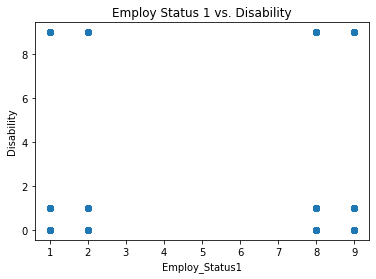

In [28]:
#Create a scatter plot to view the relationship between two varaibles:
plt.scatter(df.employ_Status1,df.disab)
plt.title('Employ Status 1 vs. Disability')
plt.xlabel('Employ_Status1')
plt.ylabel('Disability')
plt.show()

From the plot we can see that the relationship does not appear linear. As Employment status increases the disability rate increases a non linear fashion.


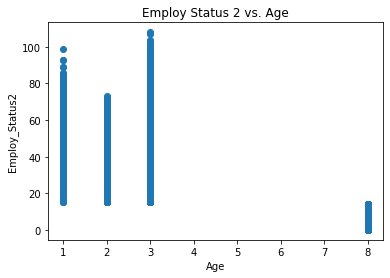

In [52]:
#Create a scatter plot to view the relationship between two varaibles:
plt.scatter(df.employ_Status2,df.Age)
plt.title('Employ Status 2 vs. Age')
plt.xlabel('Age')
plt.ylabel('Employ_Status2')
plt.show()

From our graph we can see that most of the youth around 20 to 30 years of age is unemployed.

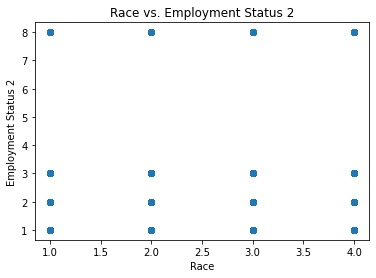

In [29]:
#Create a scatter plot to view the relationship between two varaibles:
plt.scatter(df.Race,df.employ_Status2)
plt.title('Race vs. Employment Status 2')
plt.xlabel('Race')
plt.ylabel('Employment Status 2')
plt.show()

<AxesSubplot:>

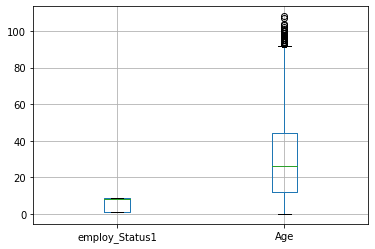

In [32]:
#Create a boxplot to visualize the distribution of Employment status and check for outliers
df.boxplot(column=['employ_Status1', 'Age'])

#There are  tiny circles in the boxplot, which means there are  outliers in our dataset

<AxesSubplot:>

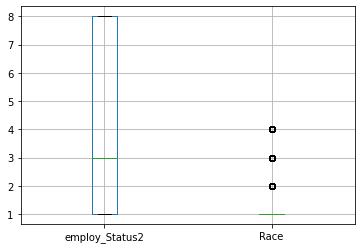

In [53]:
#Create a boxplot to visualize the distribution of Employment status and check for outliers
df.boxplot(column=['employ_Status2', 'Race'])

# Model Building

once confirm that our relationship between variables are linear and that there are  outliers present.

We can proceed to fit a simple linear regression model using Employment_status1 as the exploratory variable and Employment_status2 as the response variable.

In [54]:
#Split data into exploratory data and response variable:

In [40]:
#Define response variable
x=df[['employ_Status1']]

In [41]:
#Define explanatory variable
y=df[['employ_Status2']]

In [42]:
#Instantiate Model
LR=LinearRegression()

In [43]:
#Fit Model
LR.fit(x,y)

LinearRegression()

In [44]:
LR.coef_

array([[0.51145865]])

In [45]:
LR.intercept_

array([0.90627534])

From the model summary we can see that the fitted regression equation is: Unmeployment Rate = 0.51145865+0.90627534*(Age)

This means that each Unemployment Rate is associated with the employment status 1 and 2. Increase in employment status 1 of 0.511545865 points and intercept value 0.90627534 tells us the average. We can look at what will be a predicted Unemployment rate in the next 10 years?

In [46]:
unemployment_rate=LR.predict([[10]])

In [47]:
unemployment_rate

array([[6.0208618]])